# Homework 8

Name: Caden Matthews

Date: 10/21/2024

### **1. Problem Explanation**

In this homework, you will develop a data loader using PyTorch to load the MNIST dataset and apply various data augmentations. Data augmentation is a crucial technique in machine learning that helps improve the generalization of models by artificially increasing the diversity of the training data. By applying different transformations to the original data, such as rotations, scaling, or translations, the model becomes more robust to variations in the input.

**Objectives:**

1. **Load the MNIST Dataset:** Utilize PyTorch's `torchvision` library to download and load the MNIST dataset, which consists of handwritten digit images.

2. **Apply Data Augmentations:** Implement different augmentation techniques (e.g., random rotations, translations) to the training data to enhance its diversity.

3. **Visualize the Impact of Augmentations:** Create plots to visualize and compare the original images with their augmented counterparts. This will help you understand how each augmentation affects the data.

By completing this homework, you will gain hands-on experience in data preprocessing, augmentation, and visualization using PyTorch, which are essential skills in building effective machine learning models.

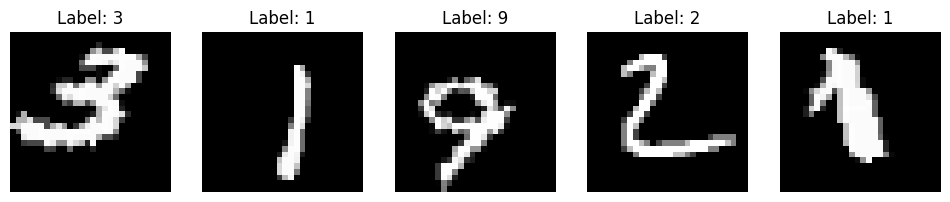

In [1]:
# Import necessary libraries
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define transformations for the training data
transform = transforms.Compose([
    # TODO: Add a random rotation augmentation with degrees between -30 and 30
    transforms.RandomRotation(degrees=30),  # Rotates between -30 and 30 degrees
    # TODO: Add a random affine transformation with translation up to 10%
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Translates up to 10%
    transforms.ToTensor(),
])

# Load the MNIST training dataset with the defined transformations
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Function to visualize original and augmented images
def visualize_augmentations(data_loader):
    # Get a batch of training data
    images, labels = next(iter(data_loader))

    # TODO: Convert the tensor images to numpy arrays for plotting
    images_np = images.numpy()

    # Plot the first 5 images in the batch
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for idx in range(5):
        ax = axes[idx]
        # TODO: Display the image
        ax.imshow(images_np[idx].squeeze(), cmap='gray')
        ax.set_title(f"Label: {labels[idx].item()}")
        ax.axis('off')
    plt.show()

# Visualize the augmented images
visualize_augmentations(train_loader)

### **2. Evaluating Overfitting and Underfitting in Neural Networks**

In this question, you will explore the concepts of **overfitting** and **underfitting** in the context of neural networks. Understanding these phenomena is crucial for building models that generalize well to unseen data.

**Key Concepts:**

- **Underfitting:** Occurs when a model is too simple to capture the underlying pattern of the data. It has high bias and performs poorly on both training and validation datasets.

- **Overfitting:** Happens when a model is too complex, capturing not only the underlying pattern but also the noise in the training data. It has high variance and performs well on training data but poorly on validation data.

**Objectives:**

1. **Generate a Synthetic Dataset:** Create a simple quadratic dataset with added noise to simulate real-world data imperfections.

2. **Define Neural Network Models with Varying Capacities:** Implement neural networks with different numbers of hidden units to observe their impact on model performance.

3. **Train the Models:** Train both underfitting and overfitting models on the synthetic dataset.

4. **Visualize the Results:** Plot the original data, the predictions of both models, and the ground truth to compare their performances.

5. **Analyze the Outcomes:** Understand how model capacity affects underfitting and overfitting by examining the plots.



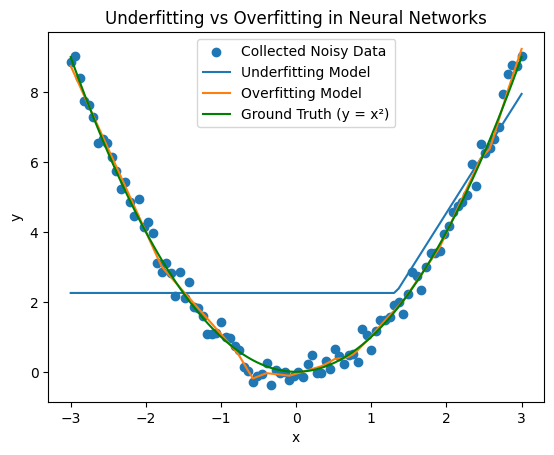

In [2]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generating synthetic dataset (simple quadratic function)
x = torch.linspace(-3, 3, 100).reshape(-1, 1)
y = x ** 2 + 0.3 * torch.randn_like(x)  # Adding noise to the data

# Plotting the data to visualize
def plot_data():
    plt.scatter(x.numpy(), y.numpy(), label='Collected Noisy Data')
    plt.xlabel('x')
    plt.ylabel('y')

# Neural Network Model with different capacities
class SimpleNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function
def train(model, epochs=500, learning_rate=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    return model

# Plotting model predictions
def plot_model(model, label):
    predictions = model(x).detach()
    plt.plot(x.numpy(), predictions.numpy(), label=label)

# TODO: Initialize an underfitting model with hidden_size=1
underfit_model = SimpleNN(hidden_size=1)

# TODO: Train the underfitting model
underfit_model = train(underfit_model)

# TODO: Initialize an overfitting model with hidden_size=50
overfit_model = SimpleNN(hidden_size=50)

# TODO: Train the overfitting model with more epochs (e.g., epochs=10000)
overfit_model = train(overfit_model, epochs=10000)

# Plotting results
plot_data()
plot_model(underfit_model, label='Underfitting Model')
plot_model(overfit_model, label='Overfitting Model')
plt.plot(x.numpy(), (x ** 2).numpy(), label='Ground Truth (y = x²)', color='green')  # Plotting the true function y = x^2
plt.legend()
plt.title('Underfitting vs Overfitting in Neural Networks')
plt.show()

### **3. Logistic Regression: Understanding Sigmoid Activation, Classification, and Binary Cross-Entropy Loss**

In this question, you will delve into the fundamentals of **Logistic Regression**, a widely used algorithm for binary classification tasks. Through this exercise, you will gain a solid understanding of key concepts such as the **sigmoid activation function**, **classification boundaries**, and **Binary Cross-Entropy Loss (BCELoss)** in the context of PyTorch. Additionally, you will learn how to implement activation functions using PyTorch's built-in modules.

**Key Concepts:**

1. **Logistic Regression:**
   - A statistical method for binary classification that models the probability of a binary outcome.
   - Utilizes the sigmoid function to map predictions to probabilities between 0 and 1.

2. **Sigmoid Activation Function:**
   - Defined as σ(x) = 1 / (1 + e⁻ˣ).
   - Transforms the linear output of a model into a probability value.
   - Essential for binary classification tasks to interpret outputs as probabilities.

3. **Binary Cross-Entropy Loss (BCELoss):**
   - A loss function suitable for binary classification problems.
   - Measures the difference between the predicted probabilities and the actual binary labels.
   - Encourages the model to output probabilities close to the true labels.

4. **Activation Functions in PyTorch:**
   - Functions applied to the output of each layer to introduce non-linearity.
   - In PyTorch, activation functions can be implemented using built-in modules like `nn.Sigmoid` or functional APIs like `torch.sigmoid`.

**Objectives:**

1. **Generate Synthetic Data for Binary Classification:**
   - Create a non-linearly separable dataset to simulate a simple classification problem.
   - Visualize the data to understand the distribution of classes.

2. **Implement Logistic Regression in PyTorch:**
   - Define a neural network model with a linear layer followed by a sigmoid activation function.
   - Understand the role of activation functions in transforming model outputs.

3. **Train the Model Using BCELoss:**
   - Utilize the Binary Cross-Entropy Loss function to optimize the model.
   - Monitor the loss to assess the training progress.

4. **Evaluate Model Performance:**
   - Calculate accuracy to evaluate how well the model classifies the data.
   - Visualize the decision boundary to understand the classification behavior.

5. **Understand Activation Functions:**
   - Learn how to apply activation functions using PyTorch modules.
   - Explore the impact of activation functions on model outputs.



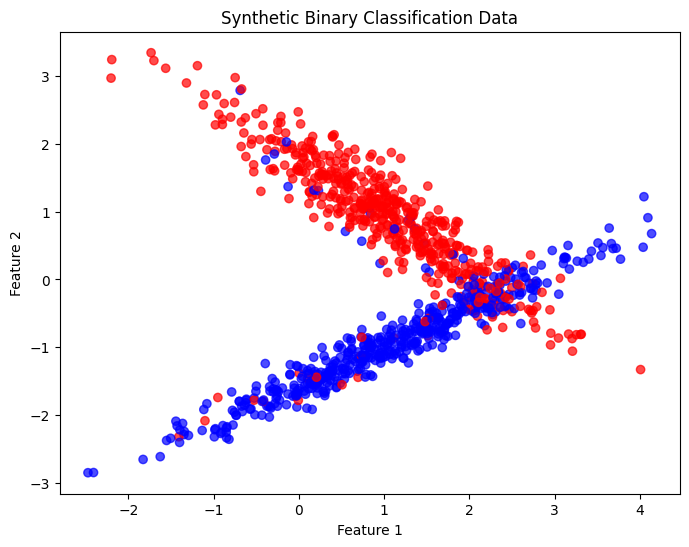

Epoch [10/100], Loss: 0.7790
Epoch [20/100], Loss: 0.6971
Epoch [30/100], Loss: 0.6323
Epoch [40/100], Loss: 0.5839
Epoch [50/100], Loss: 0.5489
Epoch [60/100], Loss: 0.5231
Epoch [70/100], Loss: 0.5029
Epoch [80/100], Loss: 0.4863
Epoch [90/100], Loss: 0.4721
Epoch [100/100], Loss: 0.4598
Accuracy: 86.50%


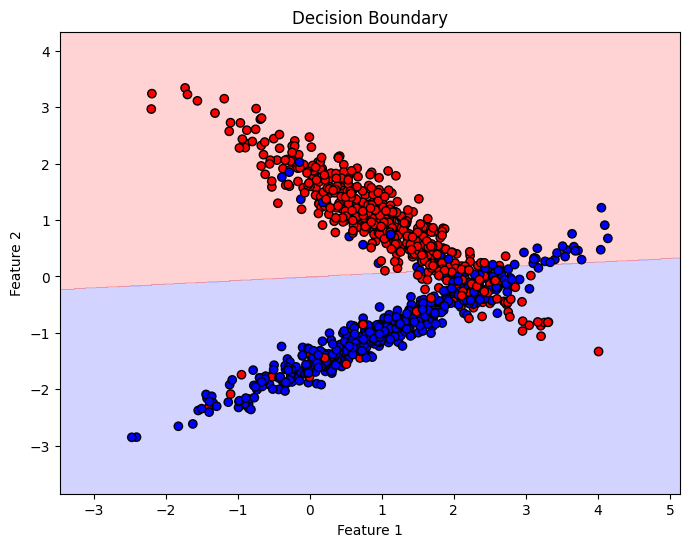

In [3]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic binary classification data
def generate_data(n_samples=1000, n_features=2, n_classes=2, random_state=42):
    X, y = make_classification(n_samples=n_samples,
                               n_features=n_features,
                               n_informative=2,
                               n_redundant=0,
                               n_clusters_per_class=1,
                               flip_y=0.1,
                               class_sep=1.0,
                               random_state=random_state)
    return X, y

# Visualize the synthetic data
def plot_data(X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Synthetic Binary Classification Data')
    plt.show()

# Define the Logistic Regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        # TODO: Define a linear layer that maps input_dim to 1
        self.linear = nn.Linear(input_dim, 1)
        # TODO: Define a sigmoid activation function
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # TODO: Pass the input through the linear layer
        out = self.linear(x)
        # TODO: Apply the sigmoid activation function
        out = self.sigmoid(out)
        return out

# Training function
def train(model, criterion, optimizer, X_train, y_train, epochs=100):
    for epoch in range(epochs):
        model.train()

        # Convert numpy arrays to torch tensors
        inputs = torch.from_numpy(X_train).float()
        labels = torch.from_numpy(y_train).float().unsqueeze(1)

        # TODO: Forward pass - compute predicted outputs by passing inputs to the model
        outputs = model(inputs)

        # TODO: Compute the loss
        loss = criterion(outputs, labels)

        # TODO: Zero the parameter gradients
        optimizer.zero_grad()

        # TODO: Backward pass and optimize
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    return model

# Evaluation function
def evaluate(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        inputs = torch.from_numpy(X_test).float()
        labels = torch.from_numpy(y_test).float().unsqueeze(1)
        # TODO: Forward pass to get outputs
        outputs = model(inputs)
        # TODO: Apply a threshold of 0.5 to get predicted labels
        predicted = (outputs >= 0.5).float()
        # TODO: Calculate accuracy
        accuracy = (predicted == labels).float().mean().item()
        print(f'Accuracy: {accuracy * 100:.2f}%')

# Main function to execute the workflow
def main():
    # Generate and plot data
    X, y = generate_data()
    plot_data(X, y)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define model, criterion and optimizer
    input_dim = X_train.shape[1]
    model = LogisticRegressionModel(input_dim)

    # TODO: Initialize Binary Cross-Entropy Loss
    criterion = nn.BCELoss()

    # TODO: Initialize the optimizer (use Adam optimizer with learning rate=0.01)
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Train the model
    model = train(model, criterion, optimizer, X_train, y_train, epochs=100)

    # Evaluate the model
    evaluate(model, X_test, y_test)

    # Visualize the decision boundary
    plot_decision_boundary(model, X, y)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = 0.01  # step size in the mesh

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Flatten the grid to pass into the model
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_tensor = torch.from_numpy(grid).float()

    with torch.no_grad():
        # TODO: Get model predictions for the grid
        Z = model(grid_tensor)
        # TODO: Apply a threshold of 0.5 to get binary predictions
        Z = (Z >= 0.5).float()
        Z = Z.reshape(xx.shape).numpy()

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

if __name__ == "__main__":
    main()
